In [3]:
import pandas as pd
import matplotlib.pyplot as plt

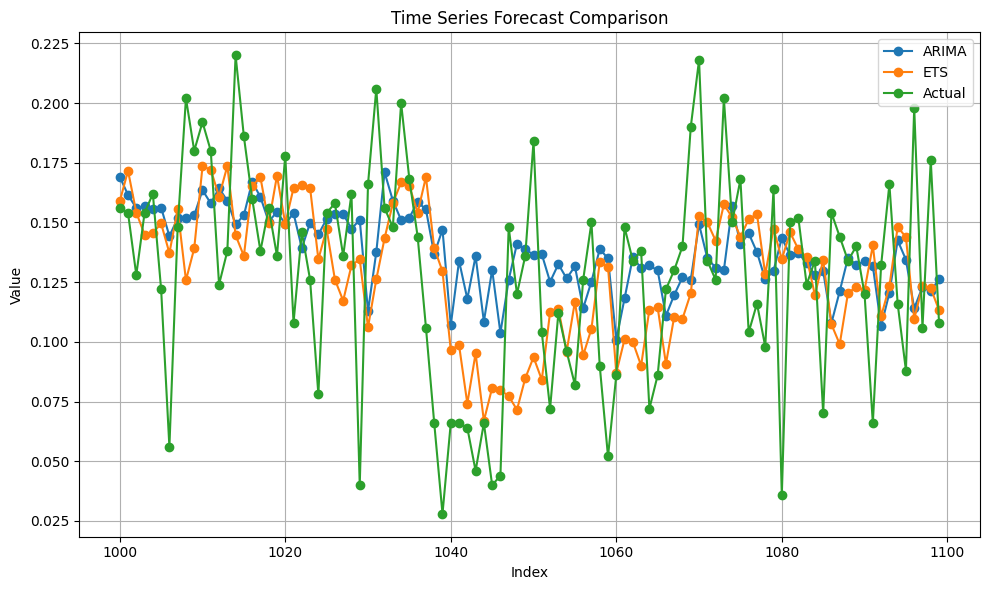

In [4]:
# Import the data
df = pd.read_csv('meta.csv')

# Plot the data
plt.figure(figsize=(10, 6))

for column in df.columns:
    if column != 'index':
        plt.plot(df['index'], df[column], label=column)

plt.title('Time Series Forecast Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()